/kaggle/input []


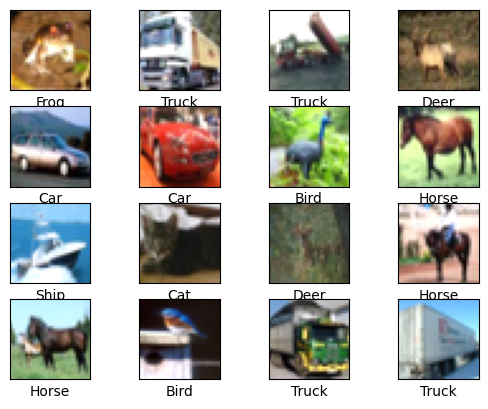

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt #
from tensorflow.keras import datasets, layers, models
import cv2 as cv

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

( training_images, training_labels ), ( testing_images, testing_labels ) = datasets.cifar10.load_data();

# scale the images down since min, max = 1, 255
training_images, testing_images = training_images / 225, testing_images / 225

class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()


In [15]:
# save resources: instead of taining the model on all the data, we just pick 20000 and 4000, training and testing data
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

# Build the neural network
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)) ) #InputLayer(shape=(, len(characters)))
# simplifies the result and reduces it to the essential information
model.add(layers.MaxPooling2D(2,2) )
# 
model.add(layers.Conv2D(64, (3,3), activation='relu') )
model.add(layers.MaxPooling2D(2,2) )
model.add( layers.Conv2D(64, (3,3), activation='relu'))
# flatten what we get
model.add( layers.Flatten())
# adding 2 dense layers
model.add( layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}") #more data would imporove accuracy

model.save('image_classifier.keras')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.2526 - loss: 1.9815 - val_accuracy: 0.4705 - val_loss: 1.4540
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.4838 - loss: 1.4316 - val_accuracy: 0.5360 - val_loss: 1.2902
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.5569 - loss: 1.2518 - val_accuracy: 0.5807 - val_loss: 1.1742
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.6000 - loss: 1.1418 - val_accuracy: 0.5943 - val_loss: 1.1438
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6263 - loss: 1.0443 - val_accuracy: 0.6127 - val_loss: 1.1068
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.6679 - loss: 0.9456 - val_accuracy: 0.6208 - val_loss: 1.0949
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.6797 - loss: 0.8907 - val_accuracy: 0.6363 - val_loss: 1.0637
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 27ms/step - accuracy: 0.7125 - loss: 0.8183 - 

In [16]:
# Load model
model = models.load_model('image_classifier.keras')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/images/car-63930_640.jpg
/kaggle/input/images/plane-8145957_640.jpg
/kaggle/input/images/horse-3611921_640.jpg
/kaggle/input/images/roe-deer-2634729_640.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction is Plane


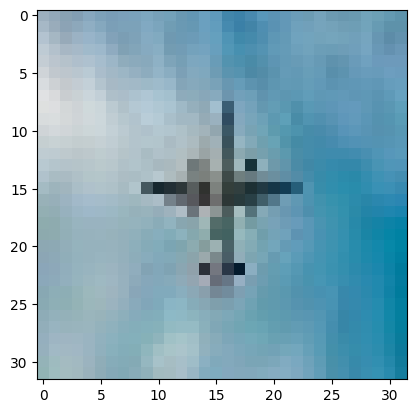

In [25]:
horse = cv.imread('/kaggle/input/images/horse-3611921_640.jpg')
deer = cv.imread('/kaggle/input/images/roe-deer-2634729_640.jpg')
car = cv.imread('/kaggle/input/images/car-63930_640.jpg')
plane = cv.imread('/kaggle/input/images/plane-8145957_640.jpg')

def bgr2rgb(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

img = bgr2rgb(plane)
plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict( np.array([img]) / 255 )
index = np.argmax(prediction)

print(f'Prediction is {class_names[index]}')

